In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from pathlib import Path

In [ ]:
def create_output_directory(base_path):
    """Create output directory for spectrograms if it doesn't exist."""
    output_dir = os.path.join(base_path, 'spectrograms_S02_P05')
    os.makedirs(output_dir, exist_ok=True)
    return output_dir

def load_audio_chunk(file_path, start_time, chunk_duration):
    """Load a chunk of audio from the file."""
    y, sr = librosa.load(file_path, offset=start_time, duration=chunk_duration)
    return y, sr

def create_spectrogram(y, sr, output_path):
    """Create and save a spectrogram for the given audio chunk."""
    plt.figure(figsize=(10, 4))
    
    # Create spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    
    # Add colorbar and labels
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    
    # Save and close
    plt.savefig(output_path)
    plt.close()

def process_audio_file(input_file, chunk_duration=30):
    """
    Process a long audio file into spectrograms.
    
    Parameters:
    input_file (str): Path to input WAV file
    chunk_duration (int): Duration of each chunk in seconds (default: 30)
    """
    # Create output directory
    base_path = os.path.dirname(input_file)
    output_dir = create_output_directory(base_path)
    
    # Get total duration of the audio file
    duration = librosa.get_duration(path=input_file)
    total_chunks = int(np.ceil(duration / chunk_duration))
    
    print(f"Total duration: {duration:.2f} seconds")
    print(f"Number of chunks: {total_chunks}")
    
    # Process each chunk
    for chunk_idx in range(total_chunks):
        start_time = chunk_idx * chunk_duration
        
        # Load audio chunk
        try:
            y, sr = load_audio_chunk(input_file, start_time, chunk_duration)
            
            # Generate output filename
            output_path = os.path.join(
                output_dir, 
                f'spectrogram_chunk_{chunk_idx:04d}.png'
            )
            
            # Create and save spectrogram
            create_spectrogram(y, sr, output_path)
            
            print(f"Processed chunk {chunk_idx + 1}/{total_chunks}")
            
        except Exception as e:
            print(f"Error processing chunk {chunk_idx}: {str(e)}")
            continue

if __name__ == "__main__":
    # Example usage
    input_file = "/home/ahmed/Task-Aware-audio-coding-perceptual/Data/dataset/S02_P05.wav"
    process_audio_file(input_file, chunk_duration=3)  

In [ ]:
def create_output_directory(base_path):
    """Create output directory for spectrograms if it doesn't exist."""
    output_dir = os.path.join(base_path, 'spectrograms_S02_P05')
    os.makedirs(output_dir, exist_ok=True)
    return output_dir

def load_audio_chunk(file_path, start_time, chunk_duration):
    """Load a chunk of audio from the file."""
    y, sr = librosa.load(file_path, offset=start_time, duration=chunk_duration)
    return y, sr

def create_spectrogram(y, sr, output_path):
    """Create and save a spectrogram for the given audio chunk."""
    plt.figure(figsize=(10, 4))
    
    # Create spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    
    # Add colorbar and labels
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    
    # Save and close
    plt.savefig(output_path)
    plt.close()

def process_audio_file(input_file, max_duration=3600, chunk_duration=3):
    """
    Process a long audio file into spectrograms.
    
    Parameters:
    input_file (str): Path to input WAV file
    max_duration (int): Maximum duration to process in seconds (default: 3600 = 1 hour)
    chunk_duration (int): Duration of each chunk in seconds (default: 3)
    """
    # Create output directory
    base_path = os.path.dirname(input_file)
    output_dir = create_output_directory(base_path)
    
    # Get total duration of the audio file or use max_duration
    total_duration = min(librosa.get_duration(path=input_file), max_duration)
    total_chunks = int(np.ceil(total_duration / chunk_duration))
    
    print(f"Processing duration: {total_duration:.2f} seconds")
    print(f"Number of chunks: {total_chunks}")
    
    # Process each chunk
    for chunk_idx in range(total_chunks):
        start_time = chunk_idx * chunk_duration
        
        # Stop if we've reached the max duration
        if start_time >= total_duration:
            break
        
        # Load audio chunk
        try:
            y, sr = load_audio_chunk(input_file, start_time, chunk_duration)
            
            # Generate output filename
            output_path = os.path.join(
                output_dir, 
                f'spectrogram_chunk_{chunk_idx:04d}.png'
            )
            
            # Create and save spectrogram
            create_spectrogram(y, sr, output_path)
            
            print(f"Processed chunk {chunk_idx + 1}/{total_chunks}")
            
        except Exception as e:
            print(f"Error processing chunk {chunk_idx}: {str(e)}")
            continue

if __name__ == "__main__":
    # Example usage
    input_file = "/home/ahmed/Task-Aware-audio-coding-perceptual/Data/dataset/S02_P05.wav"
    process_audio_file(input_file, max_duration=3600, chunk_duration=3)

In [1]:
import os
import numpy as np
import torch
import torchaudio
import matplotlib.pyplot as plt
import librosa
import librosa.display

def create_output_directory(base_path):
    """Create output directory for spectrograms if it doesn't exist."""
    output_dir = os.path.join(base_path, 'spectrograms_S02_U03CH1')
    os.makedirs(output_dir, exist_ok=True)
    return output_dir

def load_audio_chunk(file_path, start_time, chunk_duration, device='cuda'):
    """
    Load a chunk of audio from the file using torchaudio.
    
    Parameters:
    file_path (str): Path to the audio file
    start_time (float): Start time of the chunk in seconds
    chunk_duration (float): Duration of the chunk in seconds
    device (str): Device to load the tensor on (cuda or cpu)
    
    Returns:
    torch.Tensor: Audio chunk
    int: Sample rate
    """
    # First, get the sample rate
    info = torchaudio.info(file_path)
    sample_rate = info.sample_rate
    
    # Calculate frame offsets
    frame_offset = int(start_time * sample_rate)
    num_frames = int(chunk_duration * sample_rate)
    
    # Load audio chunk
    waveform, loaded_sample_rate = torchaudio.load(
        file_path, 
        frame_offset=frame_offset, 
        num_frames=num_frames
    )
    
    # Ensure mono channel
    if waveform.size(0) > 1:
        waveform = waveform.mean(dim=0, keepdim=True)
    
    # Move to specified device
    return waveform.to(device), sample_rate

def create_spectrogram(y, sr, output_path, device='cuda'):
    """
    Create and save a spectrogram for the given audio chunk.
    
    Parameters:
    y (torch.Tensor): Audio chunk
    sr (int): Sample rate
    output_path (str): Path to save the spectrogram
    device (str): Device to perform computations on
    """
    # Ensure y is on CPU for numpy operations
    y_np = y.cpu().numpy().squeeze()
    
    plt.figure(figsize=(10, 4))
    
    # Use fixed STFT parameters
    n_fft = 2048
    hop_length = 512
    
    try:
        # Compute spectrogram using librosa
        D = librosa.stft(y_np, n_fft=n_fft, hop_length=hop_length)
        D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        
        # Display spectrogram
        librosa.display.specshow(D_db, sr=sr, hop_length=hop_length, 
                                 x_axis='time', y_axis='log')
        
        # Add colorbar and labels
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        
        # Save and close
        plt.savefig(output_path)
        plt.close()
    
    except Exception as e:
        print(f"Error creating spectrogram: {e}")
        plt.close()
    
    # Clear GPU memory
    torch.cuda.empty_cache()

def process_audio_file(input_file, max_duration=3600, chunk_duration=3, device='cuda'):
    """
    Process a long audio file into spectrograms using CUDA.
    
    Parameters:
    input_file (str): Path to input WAV file
    max_duration (int): Maximum duration to process in seconds (default: 3600 = 1 hour)
    chunk_duration (int): Duration of each chunk in seconds (default: 3)
    device (str): Device to use for processing (cuda or cpu)
    """
    # Set device
    if device == 'cuda' and not torch.cuda.is_available():
        print("CUDA not available. Falling back to CPU.")
        device = 'cpu'
    
    # Create output directory
    base_path = os.path.dirname(input_file)
    output_dir = create_output_directory(base_path)
    
    # Get total duration of the audio file or use max_duration
    total_duration = min(librosa.get_duration(path=input_file), max_duration)
    total_chunks = int(np.ceil(total_duration / chunk_duration))
    
    print(f"Processing duration: {total_duration:.2f} seconds")
    print(f"Number of chunks: {total_chunks}")
    print(f"Using device: {device}")
    
    # Process each chunk
    for chunk_idx in range(total_chunks):
        start_time = chunk_idx * chunk_duration
        
        # Stop if we've reached the max duration
        if start_time >= total_duration:
            break
        
        # Load audio chunk
        try:
            y, sr = load_audio_chunk(input_file, start_time, chunk_duration, device)
            
            # Generate output filename
            output_path = os.path.join(
                output_dir, 
                f'spectrogram_chunk_{chunk_idx:04d}.png'
            )
            
            # Create and save spectrogram
            create_spectrogram(y, sr, output_path, device)
            
            print(f"Processed chunk {chunk_idx + 1}/{total_chunks}")
            
            # Explicit memory cleanup
            del y
            torch.cuda.empty_cache()
            
        except Exception as e:
            print(f"Error processing chunk {chunk_idx}: {str(e)}")
            continue

if __name__ == "__main__":
    # Example usage
    input_file = "/home/ahmed/Task-Aware-audio-coding-perceptual/Data/dataset/S02_U03.CH1.wav"
    process_audio_file(input_file, max_duration=3600, chunk_duration=3)

Processing duration: 3600.00 seconds
Number of chunks: 1200
Using device: cuda
Processed chunk 1/1200
Processed chunk 2/1200
Processed chunk 3/1200
Processed chunk 4/1200
Processed chunk 5/1200
Processed chunk 6/1200
Processed chunk 7/1200
Processed chunk 8/1200
Processed chunk 9/1200
Processed chunk 10/1200
Processed chunk 11/1200
Processed chunk 12/1200
Processed chunk 13/1200
Processed chunk 14/1200
Processed chunk 15/1200
Processed chunk 16/1200
Processed chunk 17/1200
Processed chunk 18/1200
Processed chunk 19/1200
Processed chunk 20/1200
Processed chunk 21/1200
Processed chunk 22/1200
Processed chunk 23/1200
Processed chunk 24/1200
Processed chunk 25/1200
Processed chunk 26/1200
Processed chunk 27/1200
Processed chunk 28/1200
Processed chunk 29/1200
Processed chunk 30/1200
Processed chunk 31/1200
Processed chunk 32/1200
Processed chunk 33/1200
Processed chunk 34/1200
Processed chunk 35/1200
Processed chunk 36/1200
Processed chunk 37/1200
Processed chunk 38/1200
Processed chunk 39

## Reconstruct the audio

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
from PIL import Image

def load_spectrogram_image(image_path):
    """Load the spectrogram image and convert it to a magnitude spectrogram."""
    img = Image.open(image_path)
    img = img.convert("L")  # Convert to grayscale
    spectrogram = np.array(img)

    # Normalize the spectrogram to the range [0, 1]
    spectrogram = spectrogram / 255.0
    
    # Convert to dB scale
    spectrogram_db = librosa.amplitude_to_db(spectrogram, ref=np.max)

    return spectrogram_db

def reconstruct_audio(spectrogram_db, sr, n_fft=2048, hop_length=512):
    """Reconstruct the audio signal from the spectrogram using Griffin-Lim algorithm."""
    # Convert back to amplitude
    S = librosa.db_to_amplitude(spectrogram_db)  

    # Use Griffin-Lim algorithm for reconstruction
    y_reconstructed = librosa.griffinlim(S, n_iter=32, hop_length=hop_length)

    return y_reconstructed

def main():
    # Path to your spectrogram image
    spectrogram_image_path = './Data/clean_images/spectrograms_S02_P05/spectrogram_chunk_0000.png'  # Replace with your spectrogram image path
    sr = 22050  # Set your desired sample rate (this should match your original audio file)

    # Load the spectrogram from the image
    spectrogram_db = load_spectrogram_image(spectrogram_image_path)

    # Reconstruct audio from the spectrogram
    y_reconstructed = reconstruct_audio(spectrogram_db, sr)

    # Save the reconstructed audio to a file
    output_audio_file = 'reconstructed_audio.wav'
    sf.write(output_audio_file, y_reconstructed, sr)

    print("Reconstructed audio saved as:", output_audio_file)

if __name__ == "__main__":
    main()


Reconstructed audio saved as: reconstructed_audio.wav


## Final Dataset


In [1]:
import os
import json
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [2]:
def create_output_directory(base_path, session_id, speaker):
    """Create output directory for spectrograms if it doesn't exist."""
    output_dir = os.path.join(base_path, f'spectrograms_{session_id}_{speaker}_U05.CH3')
    os.makedirs(output_dir, exist_ok=True)
    return output_dir

def load_audio_chunk(file_path, start_time_str, end_time_str):
    """Load a chunk of audio from the file using timestamp strings."""
    # Convert timestamp strings to seconds
    def timestamp_to_seconds(timestamp):
        h, m, s = timestamp.split(':')
        return float(h) * 3600 + float(m) * 60 + float(s)
    
    start_seconds = timestamp_to_seconds(start_time_str)
    end_seconds = timestamp_to_seconds(end_time_str)
    duration = end_seconds - start_seconds
    
    y, sr = librosa.load(file_path, offset=start_seconds, duration=duration)
    return y, sr

def create_spectrogram(y, sr, output_path):
    """Create and save a spectrogram for the given audio chunk."""
    plt.figure(figsize=(10, 4))
    
    # Create spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    
    # Add colorbar and labels
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    
    # Save and close
    plt.savefig(output_path)
    plt.close()

def process_audio_file(audio_file, json_file, target_speaker):
    """
    Process an audio file into spectrograms based on JSON timestamps and speaker.
    
    Parameters:
    audio_file (str): Path to input WAV file
    json_file (str): Path to JSON file containing timestamps
    target_speaker (str): Speaker ID to filter segments (e.g., 'P08')
    """
    # Create output directory
    base_path = os.path.dirname(audio_file)
    
    # Load JSON data
    with open(json_file, 'r') as f:
        segments = json.load(f)
    
    # Filter segments for target speaker
    speaker_segments = [seg for seg in segments if seg['speaker'] == target_speaker]
    
    # Create output directory using session_id from first segment
    if speaker_segments:
        session_id = speaker_segments[0]['session_id']
        output_dir = create_output_directory(base_path, session_id, target_speaker)
    else:
        print(f"No segments found for speaker {target_speaker}")
        return
    
    print(f"Processing {len(speaker_segments)} segments for speaker {target_speaker}")
    
    # Process each segment
    for i, segment in enumerate(speaker_segments):
        try:
            # Load audio chunk
            y, sr = load_audio_chunk(
                audio_file,
                segment['start_time'],
                segment['end_time']
            )
            
            # Generate output filename using segment information
            output_path = os.path.join(
                output_dir,
                f"spectrogram_{target_speaker}_{i:04d}_{segment['start_time'].replace(':', '_')}.png"
            )
            
            # Create and save spectrogram
            create_spectrogram(y, sr, output_path)
            
            print(f"Processed segment {i + 1}/{len(speaker_segments)}")
            
        except Exception as e:
            print(f"Error processing segment {i}: {str(e)}")
            continue

if __name__ == "__main__":
    # Example usage
    audio_file = "/home/ahmed/Dataset/S02_U05.CH3.wav"
    json_file = "/home/ahmed/Dataset/S02.json"  # Replace with your JSON file path
    target_speaker = "P08"  # Replace with desired speaker ID
    
    process_audio_file(audio_file, json_file, target_speaker)

Processing 1051 segments for speaker P08
Processed segment 1/1051
Processed segment 2/1051
Processed segment 3/1051
Processed segment 4/1051
Processed segment 5/1051
Processed segment 6/1051
Processed segment 7/1051
Processed segment 8/1051
Processed segment 9/1051
Processed segment 10/1051
Processed segment 11/1051
Processed segment 12/1051
Processed segment 13/1051
Processed segment 14/1051
Processed segment 15/1051
Processed segment 16/1051
Processed segment 17/1051
Processed segment 18/1051
Processed segment 19/1051
Processed segment 20/1051
Processed segment 21/1051
Processed segment 22/1051
Processed segment 23/1051
Processed segment 24/1051
Processed segment 25/1051
Processed segment 26/1051
Processed segment 27/1051
Processed segment 28/1051
Processed segment 29/1051
Processed segment 30/1051
Processed segment 31/1051
Processed segment 32/1051
Processed segment 33/1051
Processed segment 34/1051
Processed segment 35/1051
Processed segment 36/1051
Processed segment 37/1051
Proces

In [ ]:
import os
import json
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pickle
import soundfile as sf

def create_output_directory(base_path, session_id, speaker):
    """Create output directories for spectrograms and complex data."""
    spec_dir = os.path.join(base_path, f'spectrograms_{session_id}_{speaker}_U05.CH3')
    complex_dir = os.path.join(base_path, f'complex_specs_{session_id}_{speaker}_U05.CH3')
    os.makedirs(spec_dir, exist_ok=True)
    os.makedirs(complex_dir, exist_ok=True)
    return spec_dir, complex_dir

def load_audio_chunk(file_path, start_time_str, end_time_str):
    """Load a chunk of audio from the file using timestamp strings."""
    def timestamp_to_seconds(timestamp):
        h, m, s = timestamp.split(':')
        return float(h) * 3600 + float(m) * 60 + float(s)
    
    start_seconds = timestamp_to_seconds(start_time_str)
    end_seconds = timestamp_to_seconds(end_time_str)
    duration = end_seconds - start_seconds
    
    y, sr = librosa.load(file_path, offset=start_seconds, duration=duration)
    return y, sr

def create_complex_spectrogram(y, sr):
    """Create complex spectrogram with both magnitude and phase information."""
    # STFT parameters
    n_fft = 2048
    hop_length = 512
    win_length = 2048
    window = 'hann'
    
    # Compute complex STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, 
                     win_length=win_length, window=window)
    
    # Separate magnitude and phase
    magnitude = np.abs(D)
    phase = np.angle(D)
    
    # Convert magnitude to dB scale for visualization
    D_db = librosa.amplitude_to_db(magnitude, ref=np.max)
    
    return {
        'magnitude': magnitude,
        'phase': phase,
        'db_scale': D_db,
        'params': {
            'sr': sr,
            'n_fft': n_fft,
            'hop_length': hop_length,
            'win_length': win_length,
            'window': window
        }
    }

def save_spectrogram_plot(spec_data, output_path):
    """Save spectrogram visualization."""
    plt.figure(figsize=(10, 8))
    
    # Plot magnitude spectrogram
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spec_data['db_scale'], 
                           y_axis='log', 
                           x_axis='time', 
                           sr=spec_data['params']['sr'])
    plt.colorbar(format='%+2.0f dB')
    plt.title('Magnitude Spectrogram')
    
    # Plot phase spectrogram
    plt.subplot(2, 1, 2)
    librosa.display.specshow(spec_data['phase'],
                           y_axis='log',
                           x_axis='time',
                           sr=spec_data['params']['sr'])
    plt.colorbar(format='%+2.1f rad')
    plt.title('Phase Spectrogram')
    
    plt.tight_layout()
    plt.savefig(output_path)
    plt.close()

def save_complex_data(spec_data, output_path):
    """Save complete complex spectrogram data."""
    with open(output_path, 'wb') as f:
        pickle.dump(spec_data, f)

def reconstruct_audio(spec_data):
    """Reconstruct audio from complex spectrogram data."""
    # Reconstruct complex STFT
    D = spec_data['magnitude'] * np.exp(1j * spec_data['phase'])
    
    # Inverse STFT
    y_reconstructed = librosa.istft(D,
                                  hop_length=spec_data['params']['hop_length'],
                                  win_length=spec_data['params']['win_length'],
                                  window=spec_data['params']['window'])
    
    return y_reconstructed

def process_audio_file(audio_file, json_file, target_speaker):
    """Process an audio file into complex spectrograms with phase information."""
    base_path = os.path.dirname(audio_file)
    
    # Load JSON data
    with open(json_file, 'r') as f:
        segments = json.load(f)
    
    # Filter segments for target speaker
    speaker_segments = [seg for seg in segments if seg['speaker'] == target_speaker]
    
    if speaker_segments:
        session_id = speaker_segments[0]['session_id']
        spec_dir, complex_dir = create_output_directory(base_path, session_id, target_speaker)
    else:
        print(f"No segments found for speaker {target_speaker}")
        return
    
    print(f"Processing {len(speaker_segments)} segments for speaker {target_speaker}")
    
    for i, segment in enumerate(speaker_segments):
        try:
            # Load audio chunk
            y, sr = load_audio_chunk(audio_file, segment['start_time'], segment['end_time'])
            
            # Generate output filenames
            base_filename = f"{target_speaker}_{i:04d}_{segment['start_time'].replace(':', '_')}"
            spec_path = os.path.join(spec_dir, f"spectrogram_{base_filename}.png")
            complex_path = os.path.join(complex_dir, f"complex_{base_filename}.pkl")
            
            # Create complex spectrogram
            spec_data = create_complex_spectrogram(y, sr)
            
            # Save visualization
            save_spectrogram_plot(spec_data, spec_path)
            
            # Save complex data
            save_complex_data(spec_data, complex_path)
            
            # Verify reconstruction (optional)
            y_reconstructed = reconstruct_audio(spec_data)
            reconstruction_path = os.path.join(complex_dir, f"reconstructed_{base_filename}.wav")
            sf.write(reconstruction_path, y_reconstructed, sr)
            
            print(f"Processed segment {i + 1}/{len(speaker_segments)}")
            
        except Exception as e:
            print(f"Error processing segment {i}: {str(e)}")
            continue

if __name__ == "__main__":
    audio_file = "/home/ahmed/Dataset/S02_U05.CH3.wav"
    json_file = "/home/ahmed/Dataset/S02.json"
    target_speaker = "P08"
    
    process_audio_file(audio_file, json_file, target_speaker)

Processing 1051 segments for speaker P08
Processed segment 1/1051
Processed segment 2/1051
Processed segment 3/1051
Processed segment 4/1051
Processed segment 5/1051
Processed segment 6/1051
Processed segment 7/1051
Processed segment 8/1051
Processed segment 9/1051


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f1c74ee96c0>>
Traceback (most recent call last):
  File "/home/ahmed/miniconda3/envs/diffusion/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Processed segment 10/1051
Processed segment 11/1051
Processed segment 12/1051
Processed segment 13/1051
Processed segment 14/1051


In [5]:
import os
import json
import numpy as np
import librosa
import pickle

def create_output_directory(base_path, session_id, speaker):
    """Create output directory for complex data only."""
    complex_dir = os.path.join(base_path, f'complex_specs_{session_id}_{speaker}_U05.CH3')
    os.makedirs(complex_dir, exist_ok=True)
    return complex_dir

def load_audio_chunk(file_path, start_time_str, end_time_str):
    """Load a chunk of audio from the file using timestamp strings."""
    def timestamp_to_seconds(timestamp):
        h, m, s = timestamp.split(':')
        return float(h) * 3600 + float(m) * 60 + float(s)
    
    start_seconds = timestamp_to_seconds(start_time_str)
    end_seconds = timestamp_to_seconds(end_time_str)
    duration = end_seconds - start_seconds
    
    y, sr = librosa.load(file_path, offset=start_seconds, duration=duration)
    return y, sr

def create_complex_spectrogram(y, sr):
    """Create complex spectrogram with both magnitude and phase information."""
    # STFT parameters
    n_fft = 2048
    hop_length = 512
    win_length = 2048
    window = 'hann'
    
    # Compute complex STFT
    D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length, 
                     win_length=win_length, window=window)
    
    # Separate magnitude and phase
    magnitude = np.abs(D)
    phase = np.angle(D)
    
    return {
        'magnitude': magnitude,
        'phase': phase,
        'params': {
            'sr': sr,
            'n_fft': n_fft,
            'hop_length': hop_length,
            'win_length': win_length,
            'window': window
        }
    }

def save_complex_data(spec_data, output_path):
    """Save complete complex spectrogram data as a .pkl file."""
    with open(output_path, 'wb') as f:
        pickle.dump(spec_data, f)

def process_audio_file(audio_file, json_file, target_speaker):
    """Process an audio file into complex spectrograms with phase information."""
    base_path = os.path.dirname(audio_file)
    
    # Load JSON data
    with open(json_file, 'r') as f:
        segments = json.load(f)
    
    # Filter segments for target speaker
    speaker_segments = [seg for seg in segments if seg['speaker'] == target_speaker]
    
    if speaker_segments:
        session_id = speaker_segments[0]['session_id']
        complex_dir = create_output_directory(base_path, session_id, target_speaker)
    else:
        print(f"No segments found for speaker {target_speaker}")
        return
    
    print(f"Processing {len(speaker_segments)} segments for speaker {target_speaker}")
    
    for i, segment in enumerate(speaker_segments):
        try:
            # Load audio chunk
            y, sr = load_audio_chunk(audio_file, segment['start_time'], segment['end_time'])
            
            # Generate output filename
            base_filename = f"{target_speaker}_{i:04d}_{segment['start_time'].replace(':', '_')}"
            complex_path = os.path.join(complex_dir, f"complex_{base_filename}.pkl")
            
            # Create and save complex spectrogram
            spec_data = create_complex_spectrogram(y, sr)
            save_complex_data(spec_data, complex_path)
            
            print(f"Processed segment {i + 1}/{len(speaker_segments)}")
            
        except Exception as e:
            print(f"Error processing segment {i}: {str(e)}")
            continue

if __name__ == "__main__":
    audio_file = "/home/ahmed/Dataset/S02_U05.CH3.wav"
    json_file = "/home/ahmed/Dataset/S02.json"
    target_speaker = "P08"
    
    process_audio_file(audio_file, json_file, target_speaker)


Processing 1051 segments for speaker P08
Processed segment 1/1051
Processed segment 2/1051
Processed segment 3/1051
Processed segment 4/1051
Processed segment 5/1051
Processed segment 6/1051
Processed segment 7/1051
Processed segment 8/1051
Processed segment 9/1051
Processed segment 10/1051
Processed segment 11/1051
Processed segment 12/1051
Processed segment 13/1051
Processed segment 14/1051
Processed segment 15/1051
Processed segment 16/1051
Processed segment 17/1051
Processed segment 18/1051
Processed segment 19/1051
Processed segment 20/1051
Processed segment 21/1051
Processed segment 22/1051
Processed segment 23/1051
Processed segment 24/1051
Processed segment 25/1051
Processed segment 26/1051
Processed segment 27/1051
Processed segment 28/1051
Processed segment 29/1051
Processed segment 30/1051
Processed segment 31/1051
Processed segment 32/1051
Processed segment 33/1051
Processed segment 34/1051
Processed segment 35/1051
Processed segment 36/1051
Processed segment 37/1051
Proces

In [6]:
import pickle

# Specify the path to your .pkl file
pkl_file = "/home/ahmed/Task-Aware-audio-coding-perceptual/Data/complex/complex_specs_S02_P08/Train/complex_P08_0000_00_01_13.50.pkl"

# Load the .pkl file
with open(pkl_file, "rb") as file:
    data = pickle.load(file)

# Check the type and shape of the loaded data
if isinstance(data, dict):
    print("The data is a dictionary with keys:", data.keys())
    for key, value in data.items():
        if hasattr(value, 'shape'):
            print(f"Shape of data under key '{key}':", value.shape)
        else:
            print(f"Data under key '{key}' is not an array-like structure.")
elif hasattr(data, 'shape'):
    print("Shape of the data:", data.shape)
else:
    print("Data is not an array-like structure and has no shape attribute.")


The data is a dictionary with keys: dict_keys(['magnitude', 'phase', 'params'])
Shape of data under key 'magnitude': (1025, 123)
Shape of data under key 'phase': (1025, 123)
Data under key 'params' is not an array-like structure.


# Spectrogram

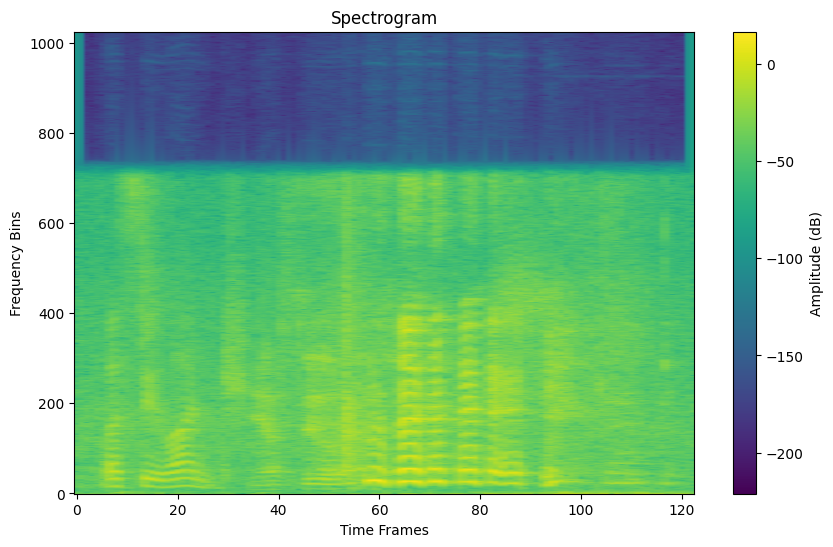

In [10]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the .pkl file
file_path = '/home/ahmed/Task-Aware-audio-coding-perceptual/Data/complex/complex_specs_S02_P08/Train/complex_P08_0000_00_01_13.50.pkl'  # Replace 'your_file.pkl' with the path to your .pkl file

with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Extract magnitude and phase data from the dictionary
magnitude = data['magnitude']
phase = data['phase']

# Create a spectrogram plot using the magnitude data
plt.figure(figsize=(10, 6))
plt.imshow(20 * np.log10(np.abs(magnitude)), aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Amplitude (dB)')
plt.xlabel('Time Frames')
plt.ylabel('Frequency Bins')
plt.title('Spectrogram')

# Show the plot
plt.show()


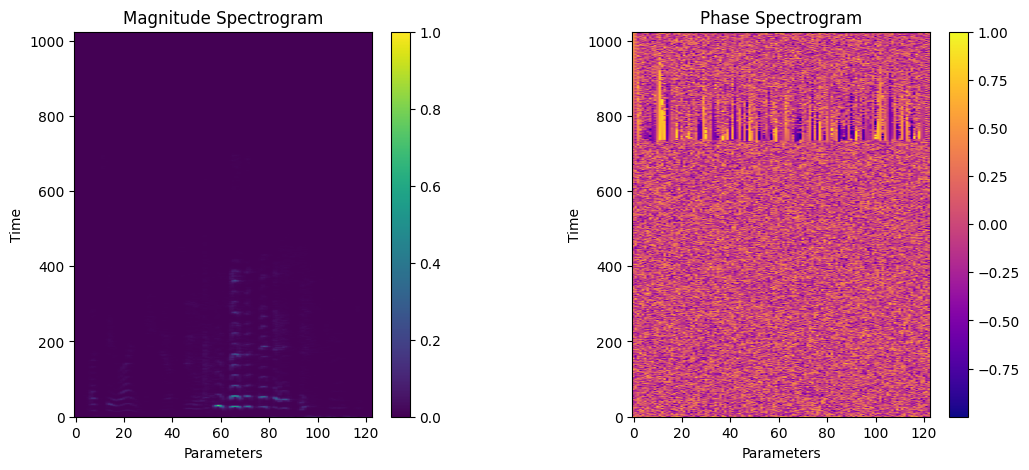

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the .pkl file
with open('/home/ahmed/Task-Aware-audio-coding-perceptual/Data/complex/complex_specs_S02_P08/Train/complex_P08_0000_00_01_13.50.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract the necessary data from the dictionary
magnitude = data['magnitude']
phase = data['phase']
params = data['params']

# Normalize the magnitude and phase data
magnitude = magnitude / np.nanmax(magnitude)
phase = phase / np.nanmax(phase)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the magnitude spectrogram
im1 = ax1.imshow(magnitude, aspect='auto', origin='lower', cmap='viridis')
ax1.set_title('Magnitude Spectrogram')
ax1.set_xlabel('Parameters')
ax1.set_ylabel('Time')
fig.colorbar(im1, ax=ax1)

# Plot the phase spectrogram
im2 = ax2.imshow(phase, aspect='auto', origin='lower', cmap='plasma')
ax2.set_title('Phase Spectrogram')
ax2.set_xlabel('Parameters')
ax2.set_ylabel('Time')
fig.colorbar(im2, ax=ax2)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
#divide the .wav file into 10 second chunks
import os
import librosa
